In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"raginisingu","key":"be1fbce375c533f28d40c4a55259ab84"}'}

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import shutil

# Assuming the output is saved in a folder called 'runs'
# Move results to your Google Drive folder
shutil.move('/content/runs', '/content/drive/MyDrive/runs')

'/content/drive/MyDrive/runs'

In [3]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d pkdarabi/The-Drug-Name-Detection-Dataset

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/The-Drug-Name-Detection-Dataset
License(s): Attribution 4.0 International (CC BY 4.0)
The-Drug-Name-Detection-Dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip The-Drug-Name-Detection-Dataset.zip

Archive:  The-Drug-Name-Detection-Dataset.zip
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data.yaml               
  inflating: test/images/20230812_210244_jpg.rf.a2373a15c967eb6a157295e74fc71f45.jpg  
  inflating: test/images/20230812_210441_jpg.rf.304261eeea390228fdd99f23079290aa.jpg  
  inflating: test/images/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg  
  inflating: test/images/20230812_214043_jpg.rf.0df6b253cf09bd47d9ffd72f8158b5d6.jpg  
  inflating: test/images/20230812_215836_jpg.rf.c9608220426c128e75c907d143f77f9a.jpg  
  inflating: test/images/20230812_215916_jpg.rf.73cc868bb2038044a6820f8607aae04e.jpg  
  inflating: test/images/20230812_220455_jpg.rf.16415c5c975af2d02396f2e1957dd1e6.jpg  
  inflating: test/images/20230812_220806_jpg.rf.fcd789d33cef3a7206e33007a1326197.jpg  
  inflating: test/images/20230812_220950_jpg.rf.c777cf6714c8ca0516786538db965e15.jpg  
  inflating: test/images/20230812_221022_jpg.rf.ff9b48cd047470b76d559fb3ce

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install ultralytics --quiet

In [9]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.7MB/s]


In [10]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')

In [11]:
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from ultralytics import YOLO
from PIL import Image
seed=1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


In [12]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import ImageDraw
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader
from tqdm import tqdm

In [13]:
result = model.train(data="/content/data.yaml",epochs=50,save_period=10,seed=seed,name="yolo8n")

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=yolo8n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=1, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.5MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1276 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1276/1276 [00:00<00:00, 1873.22it/s]


train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 182, len(boxes) = 1277. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100%|██████████| 365/365 [00:00<00:00, 751.99it/s]


val: New cache created: /content/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/yolo8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo8n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G      1.832      3.653      1.587         18        640: 100%|██████████| 80/80 [00:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        365        364      0.204      0.212      0.112     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.14G      1.758      2.992      1.576         19        640: 100%|██████████| 80/80 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]

                   all        365        364     0.0565      0.253     0.0465     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G      1.762      2.634      1.608         18        640: 100%|██████████| 80/80 [00:26<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]


                   all        365        364      0.183      0.245      0.114      0.045

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.14G      1.743      2.398        1.6         16        640: 100%|██████████| 80/80 [00:24<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]

                   all        365        364      0.212      0.357      0.175     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.14G      1.756      2.275      1.629         18        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]


                   all        365        364      0.261      0.416       0.23     0.0962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G      1.676      2.213      1.568         11        640: 100%|██████████| 80/80 [00:25<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        365        364      0.306      0.327      0.243      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G      1.666      2.116      1.541         20        640: 100%|██████████| 80/80 [00:23<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]

                   all        365        364      0.342      0.368      0.314       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      1.636      2.061      1.528         19        640: 100%|██████████| 80/80 [00:25<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]

                   all        365        364      0.328      0.412      0.309      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G      1.592      2.003      1.515         18        640: 100%|██████████| 80/80 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]

                   all        365        364      0.225      0.379      0.218      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.14G      1.582      1.981      1.503         19        640: 100%|██████████| 80/80 [00:27<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        365        364       0.29      0.409      0.287      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.14G      1.562      1.958      1.466         21        640: 100%|██████████| 80/80 [00:23<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        365        364      0.353       0.44      0.346      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G      1.562      1.929      1.446         14        640: 100%|██████████| 80/80 [00:27<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]

                   all        365        364      0.433      0.503      0.394      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.14G       1.52      1.873      1.431         22        640: 100%|██████████| 80/80 [00:24<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]


                   all        365        364       0.41      0.566      0.396      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.14G      1.477      1.846      1.398         24        640: 100%|██████████| 80/80 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        365        364      0.408       0.47      0.409      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G      1.475      1.803      1.412         20        640: 100%|██████████| 80/80 [00:25<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        365        364      0.457        0.5       0.43      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.13G      1.473      1.807      1.428         19        640: 100%|██████████| 80/80 [00:23<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]


                   all        365        364      0.432      0.478      0.413      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.13G      1.499      1.796      1.419         19        640: 100%|██████████| 80/80 [00:25<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        365        364      0.442      0.508      0.431       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.13G      1.417      1.726      1.357         23        640: 100%|██████████| 80/80 [00:23<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        365        364      0.404      0.497      0.449      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G       1.42      1.675      1.362         17        640: 100%|██████████| 80/80 [00:27<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        365        364      0.367      0.539      0.393      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.13G       1.42      1.697      1.365         21        640: 100%|██████████| 80/80 [00:24<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        365        364      0.443      0.462      0.413       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G      1.429      1.704       1.37         27        640: 100%|██████████| 80/80 [00:26<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]

                   all        365        364      0.409      0.549      0.426      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.13G      1.381      1.642      1.342         17        640: 100%|██████████| 80/80 [00:24<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]

                   all        365        364      0.551      0.496      0.489      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.13G      1.367      1.646       1.32         18        640: 100%|██████████| 80/80 [00:24<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        365        364      0.521      0.511      0.511      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.13G      1.363       1.56      1.327         21        640: 100%|██████████| 80/80 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        365        364      0.475      0.549      0.482      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.13G      1.339      1.599      1.297         19        640: 100%|██████████| 80/80 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]

                   all        365        364      0.508      0.541      0.523      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.13G      1.372      1.567      1.306         13        640: 100%|██████████| 80/80 [00:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]

                   all        365        364      0.498      0.629      0.557      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.13G      1.358      1.563        1.3         18        640: 100%|██████████| 80/80 [00:24<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]

                   all        365        364      0.497      0.576      0.532      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.13G      1.316      1.506      1.277         22        640: 100%|██████████| 80/80 [00:26<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]

                   all        365        364      0.543      0.566      0.546      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.13G      1.313      1.543      1.278         27        640: 100%|██████████| 80/80 [00:23<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        365        364      0.521      0.525      0.521      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.13G      1.303      1.476      1.263         21        640: 100%|██████████| 80/80 [00:25<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]

                   all        365        364      0.509      0.615       0.53      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.13G      1.282      1.473       1.26         22        640: 100%|██████████| 80/80 [00:22<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.06it/s]

                   all        365        364      0.553      0.607      0.566      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.13G      1.285      1.503      1.266         18        640: 100%|██████████| 80/80 [00:24<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]

                   all        365        364      0.574      0.569      0.565      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.13G      1.291      1.459      1.262         20        640: 100%|██████████| 80/80 [00:23<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]


                   all        365        364      0.523      0.563      0.568      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.13G      1.242      1.438      1.231         24        640: 100%|██████████| 80/80 [00:24<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]

                   all        365        364        0.6      0.602      0.586      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.13G      1.272      1.437       1.25         14        640: 100%|██████████| 80/80 [00:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]

                   all        365        364      0.611       0.58      0.586      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.13G      1.239      1.374      1.231         29        640: 100%|██████████| 80/80 [00:25<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        365        364      0.559      0.571      0.566      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.13G      1.233      1.398      1.223         16        640: 100%|██████████| 80/80 [00:26<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        365        364      0.609      0.583      0.614      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.13G      1.244       1.39      1.223         24        640: 100%|██████████| 80/80 [00:24<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        365        364      0.562      0.585      0.591       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.13G      1.225      1.348      1.214         19        640: 100%|██████████| 80/80 [00:26<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]

                   all        365        364      0.657      0.569      0.625      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.13G      1.199      1.304      1.199         24        640: 100%|██████████| 80/80 [00:24<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        365        364      0.614      0.585      0.605      0.353


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G      1.162      1.244      1.194         12        640: 100%|██████████| 80/80 [00:27<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        365        364      0.619      0.646      0.614      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G       1.14      1.181      1.175         11        640: 100%|██████████| 80/80 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]

                   all        365        364      0.616      0.626      0.627      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.13G      1.142      1.181      1.177         12        640: 100%|██████████| 80/80 [00:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]

                   all        365        364      0.633      0.615      0.638      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.13G      1.114      1.146      1.151         12        640: 100%|██████████| 80/80 [00:23<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]

                   all        365        364      0.662      0.585      0.656      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.14G      1.079      1.141      1.138         13        640: 100%|██████████| 80/80 [00:22<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]

                   all        365        364      0.662      0.635      0.674      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.13G       1.08      1.079      1.136         12        640: 100%|██████████| 80/80 [00:23<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        365        364      0.641      0.651      0.683      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.13G      1.077      1.084      1.134         12        640: 100%|██████████| 80/80 [00:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]

                   all        365        364      0.695      0.604      0.686      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.13G      1.067      1.069       1.13         12        640: 100%|██████████| 80/80 [00:24<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        365        364      0.738      0.628      0.692      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G      1.053      1.033      1.112         13        640: 100%|██████████| 80/80 [00:23<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]

                   all        365        364       0.67      0.653      0.691      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.13G      1.037      1.036      1.115         12        640: 100%|██████████| 80/80 [00:23<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        365        364      0.748      0.602      0.697      0.427



50 epochs completed in 0.411 hours.
Optimizer stripped from runs/detect/yolo8n/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo8n/weights/best.pt, 6.2MB

Validating runs/detect/yolo8n/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]


                   all        365        364      0.748      0.602      0.697      0.427
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/yolo8n


In [14]:
model_best = YOLO('/content/runs/detect/')

In [16]:
from IPython.display import Image

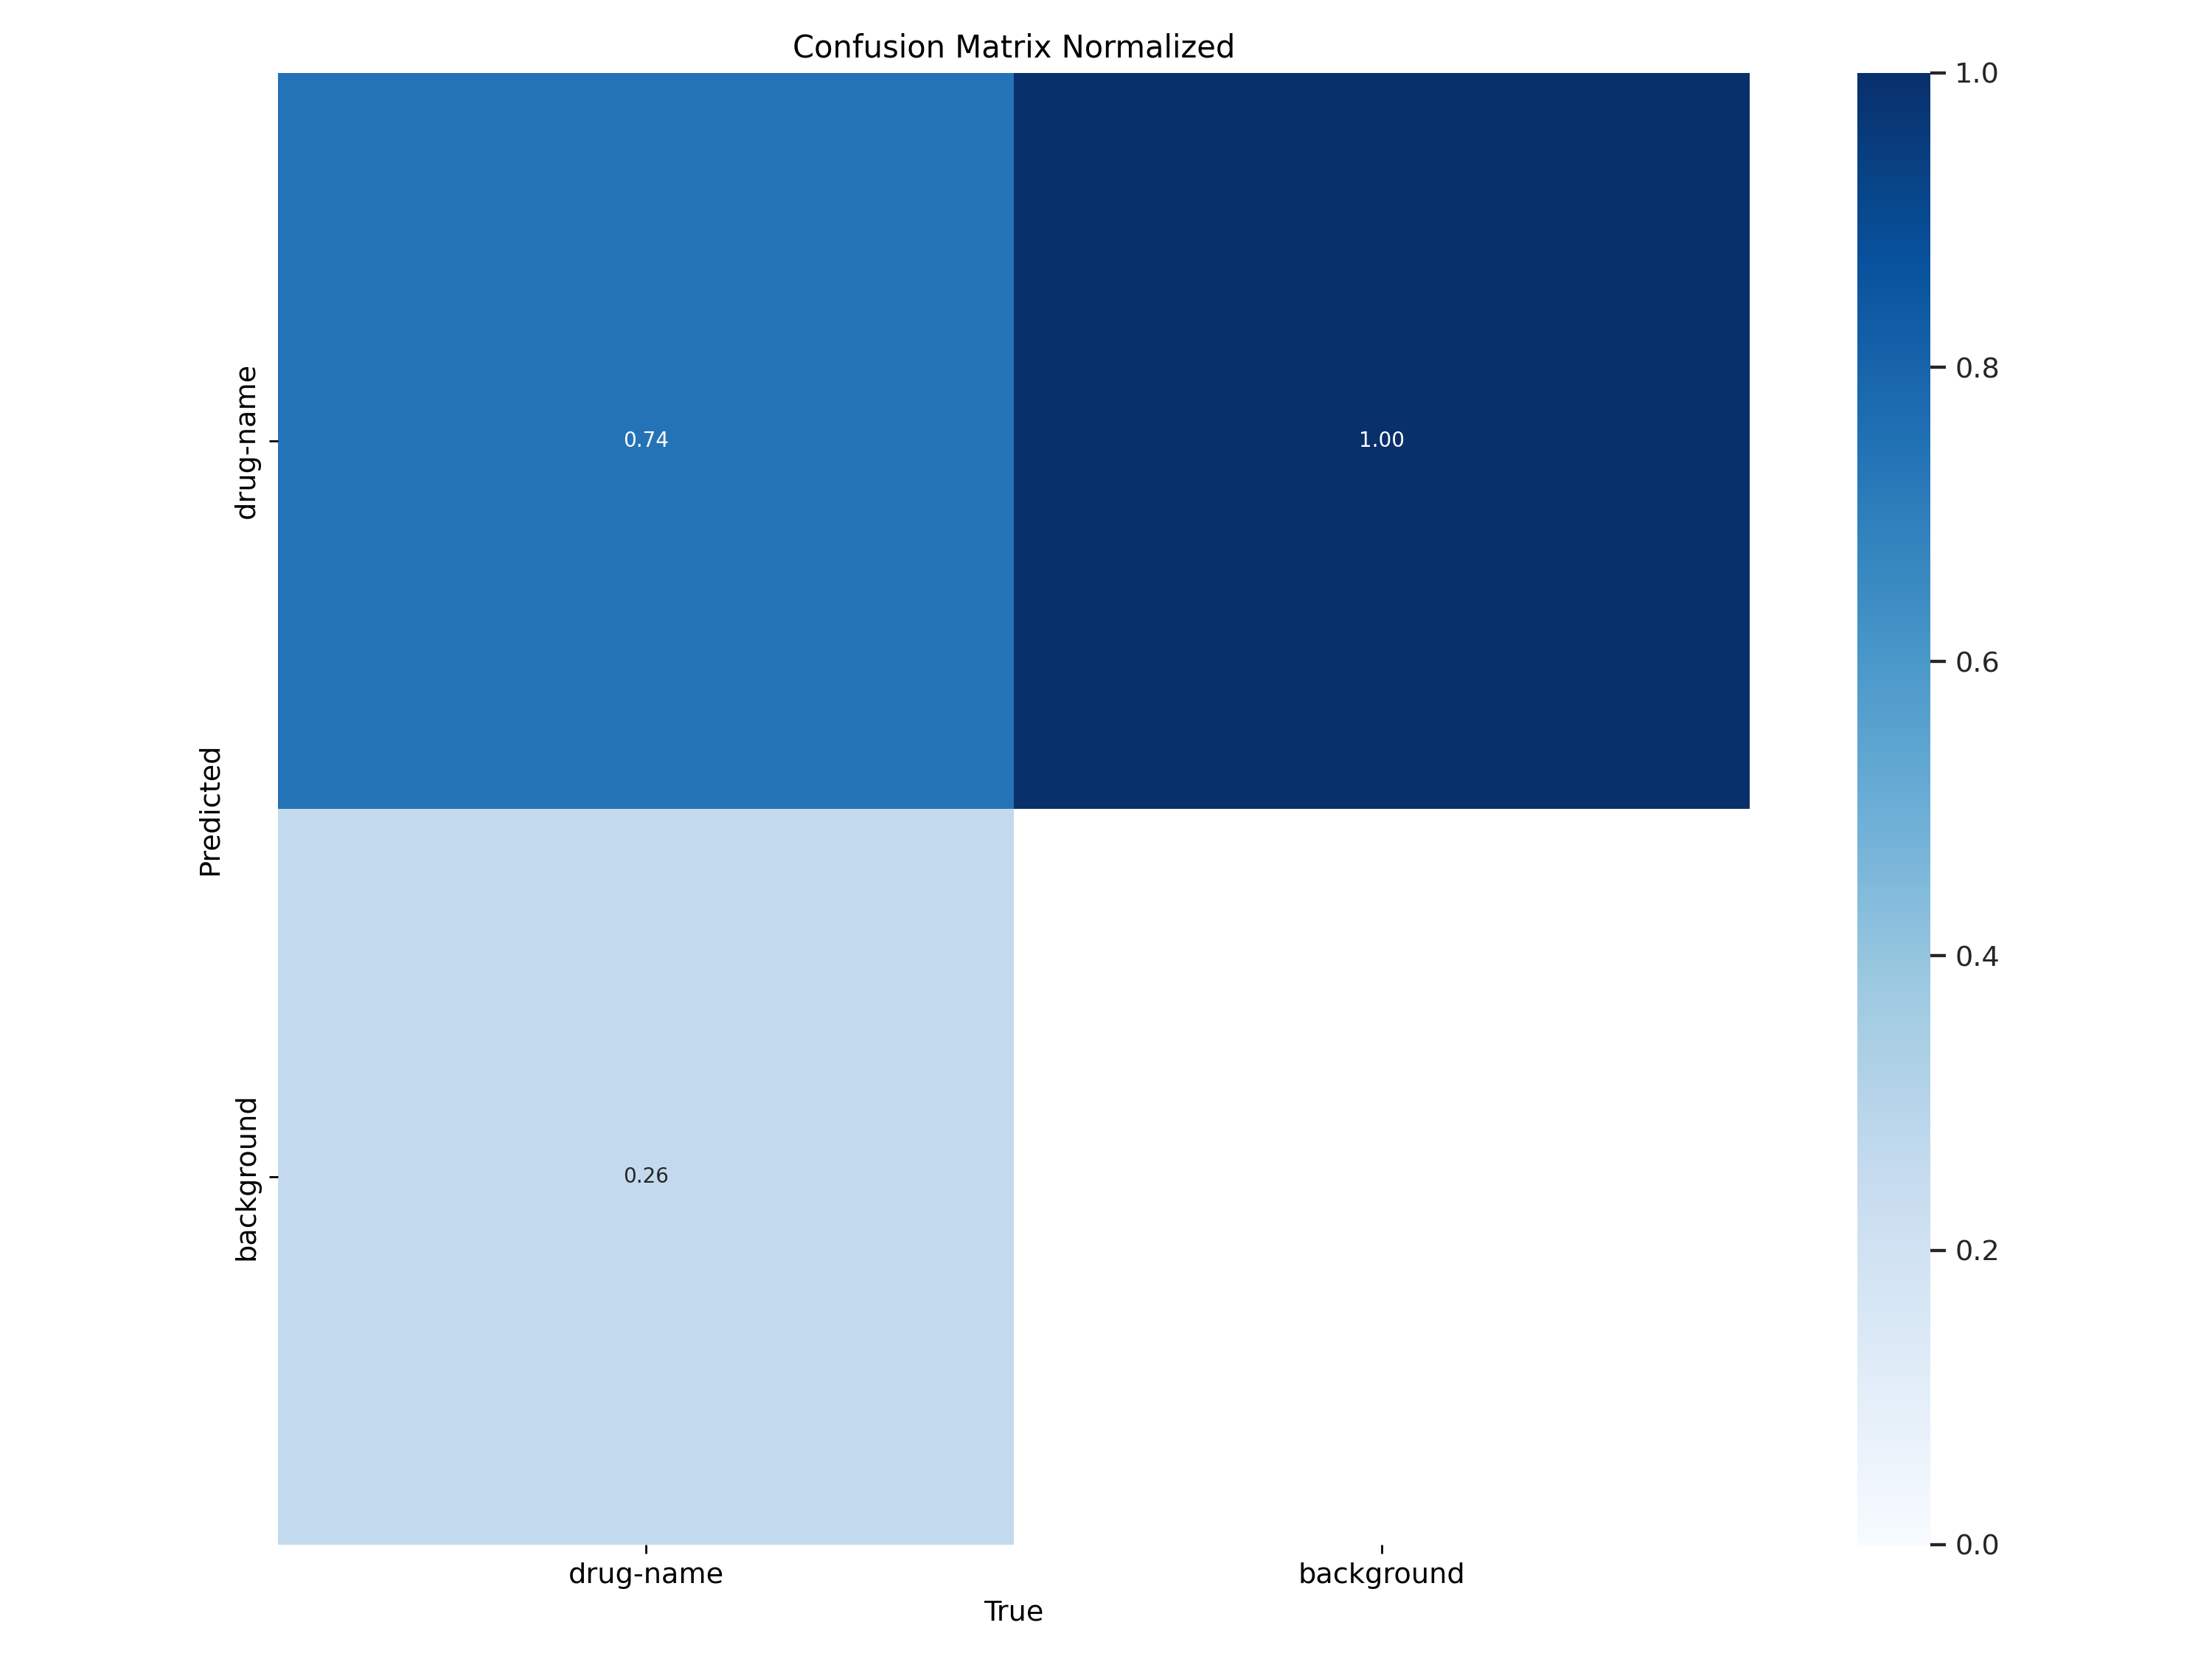

In [17]:
image_path=("/content/runs/detect/yolo8n/confusion_matrix_normalized.png")
Image(filename=image_path)

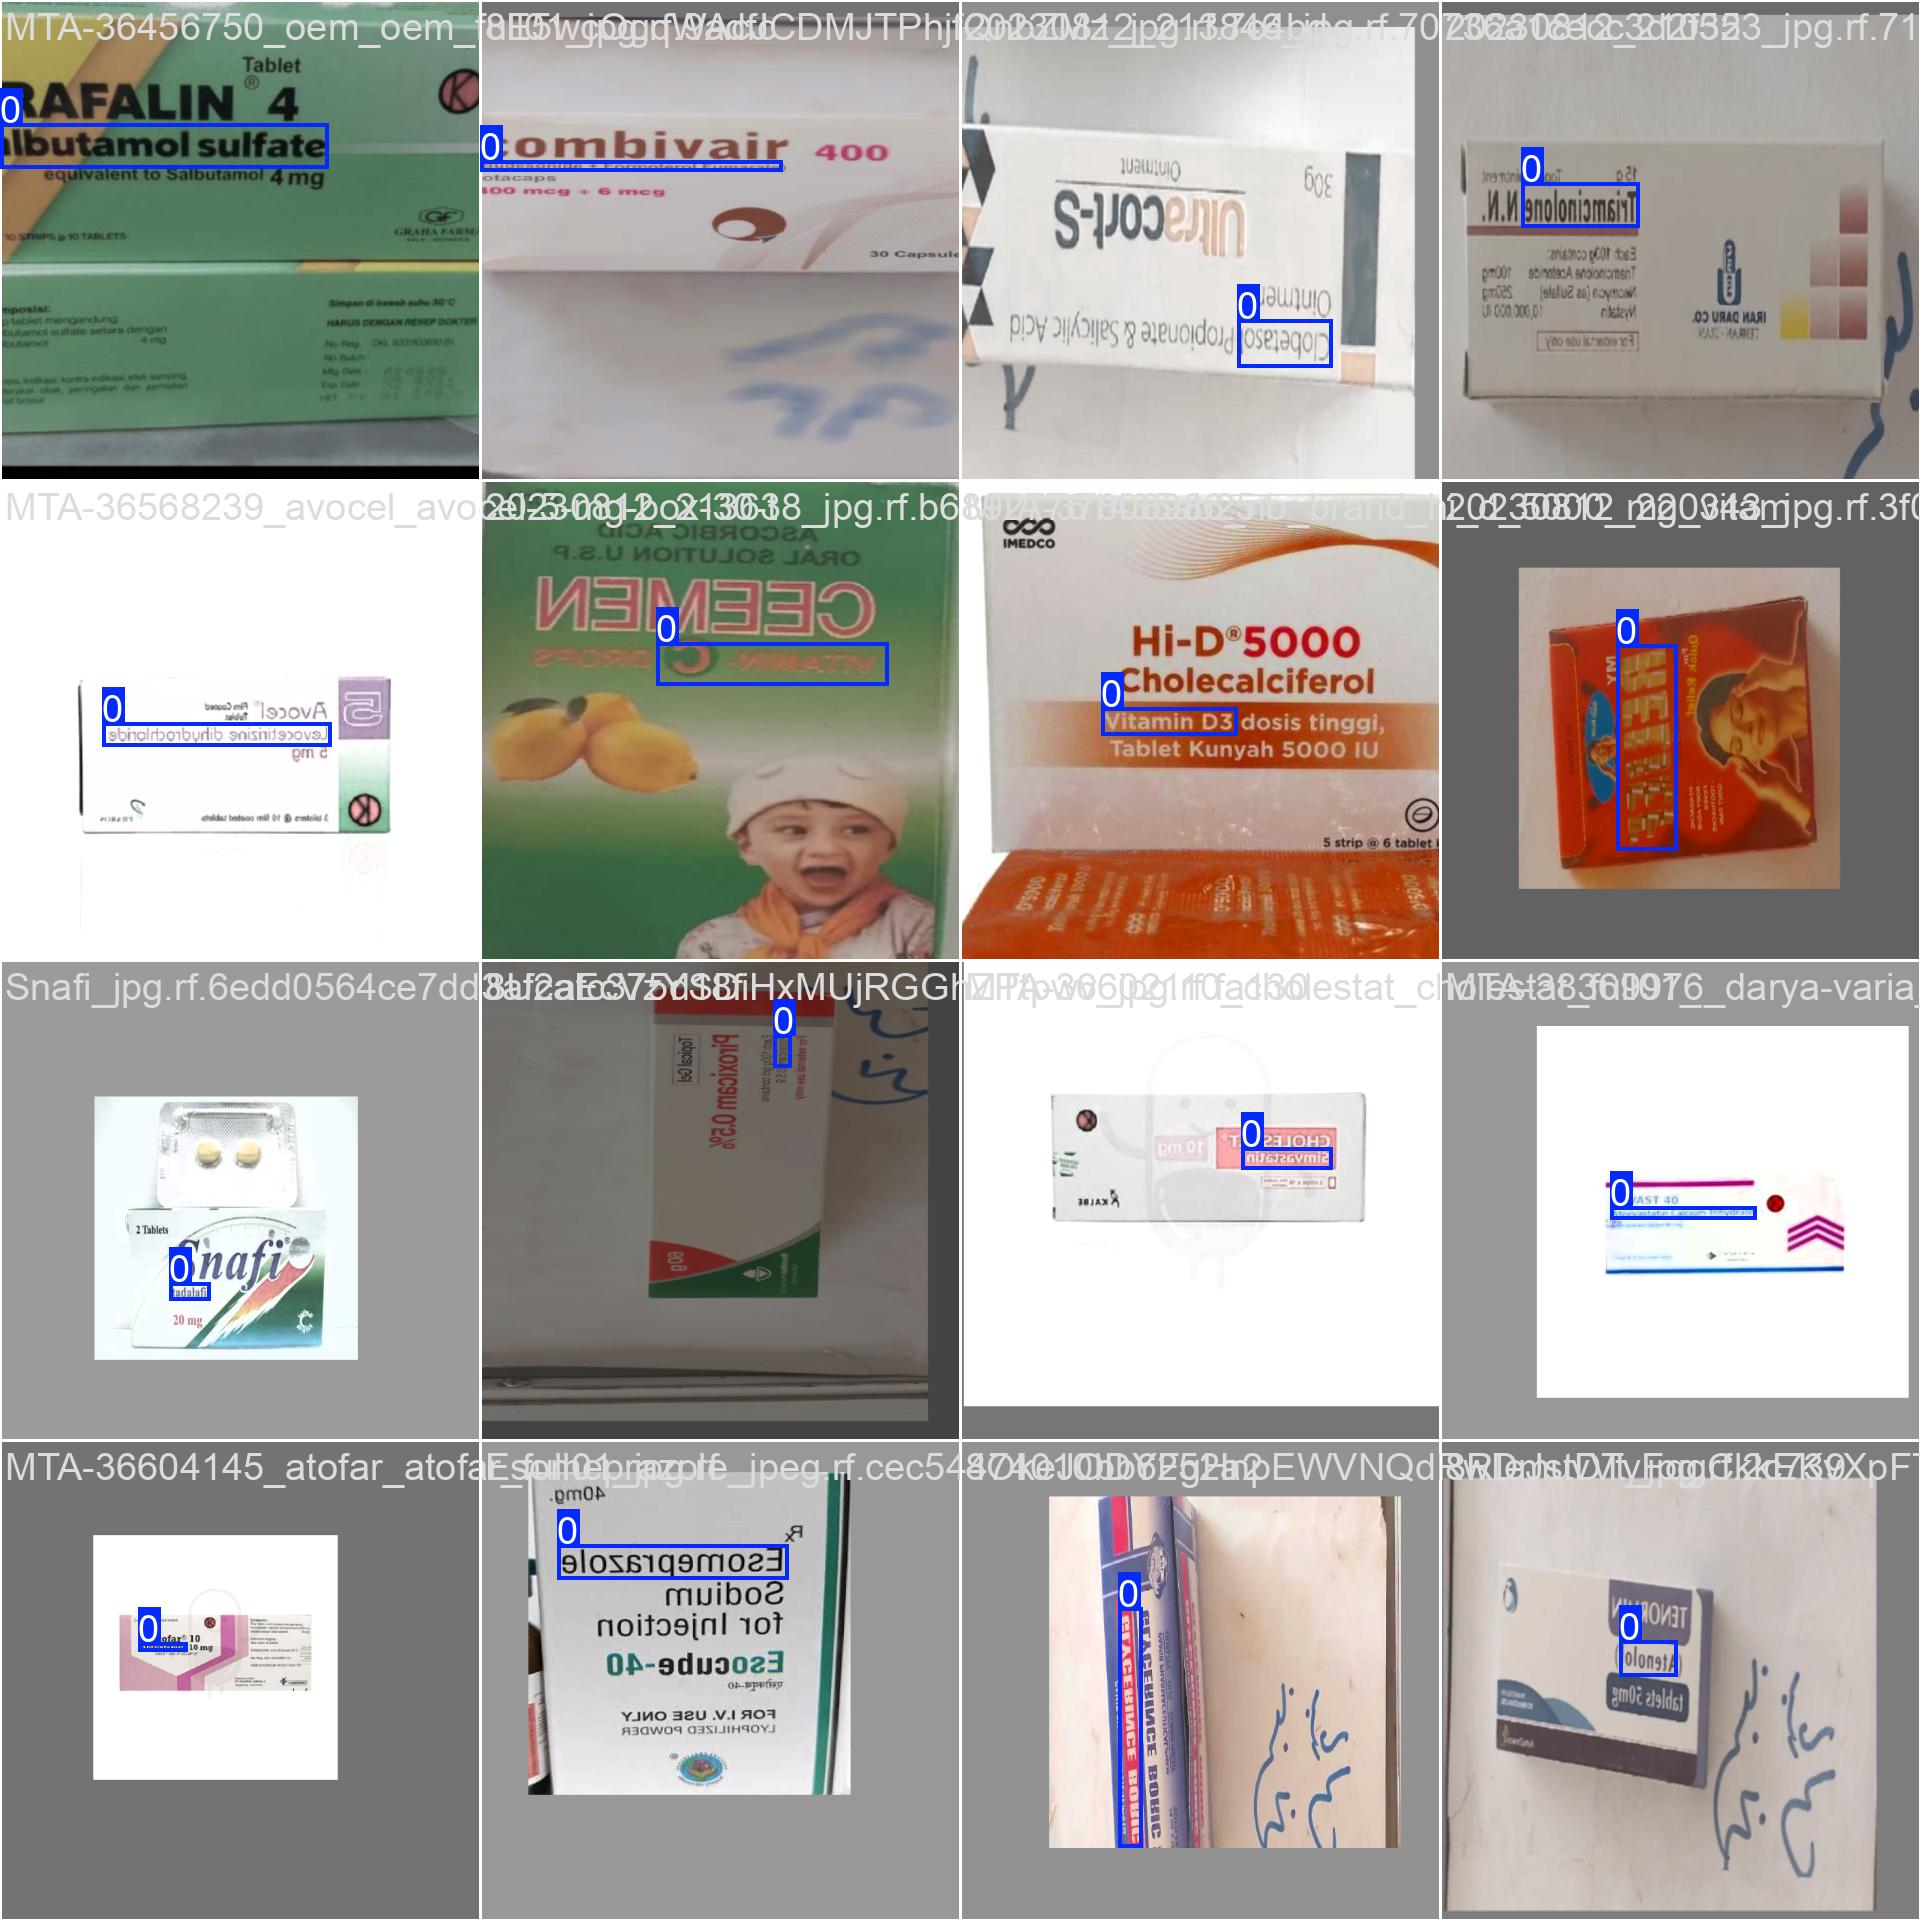

In [18]:
image_path="/content/runs/detect/yolo8n/train_batch3200.jpg"
Image(filename=image_path)

In [19]:
paths=glob.glob("/content/test/images/")

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
results=[]
n=len(results)
for i in range(n):
    r = results[i]
    img=Image.fromarray(r.plot())
    plt.figure(dpi=100)
    plt.figure(dpi=100)
    plt.imshow(img)


In [21]:
paths_valid=glob.glob("/content/valid/images/")

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
def plot_images(model,image_path):
    predictions=model.predict([image_path])
    for i in range(min(n,len(predictions))):
        detection=predictions[i]
        img=Image.fromarray(detection.plot())
        plt.figure(dpi=100)
        plt.imshow(img)
        plt.axis("off")
        plt.tight_layout()
        plt.show()

image_path='/content/valid/images/20230812_214730_jpg.rf.a90d56680f48381e6b3098facf63977f.jpg'
plot_images(model,image_path)



0: 640x640 2 drug-names, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [23]:
image_path="/content/valid/images/Lovastatin_png.rf.c753cec99f14aa595a96c29953c770ec.jpg"
plot_images(model,image_path)


0: 640x640 1 drug-name, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
image_path="/content/train/images/20230812_220752_jpg.rf.97d221a813284d0f628acd48c351aec6.jpg"
plot_images(model,image_path)


0: 640x640 2 drug-names, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [25]:
image_path="/content/test/images/20230812_220950_jpg.rf.c777cf6714c8ca0516786538db965e15.jpg"
plot_images(model=model,image_path=image_path)


0: 640x640 1 drug-name, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


In [27]:
image_path="/content/test/images/MTA-37826974_brd-44261_denicam-20-box-_full01_jpg.rf.af7cff9634b9f61f8d495e2da33de7bf.jpg"
plot_images(model=model,image_path=image_path)


0: 640x640 3 drug-names, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
